In [1]:
#import dependancies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats=np.random.uniform(low=-90.000,high=90.000,size=1500)

lngs=np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [7]:
#Import dependencies
from citipy import citipy
import requests
from config import api_key
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [8]:
#Create an empty list to hold the weather data
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 toS the record count
    record_count += 1

    ### Code Breakdown ###
    #Create a for loop with the enumerate() method and reference the index and the city in the list
    #Check if the remainder of the index divided by 50 is equal to zero, AND if the index is greater than or equal to 50,
    # using a conditional statement.
    #Create a URL endpoint in the conditional statement. However, we are removing blank spaces in the city name and 
    # concatenating the city name using city.replace(" ","+"). This will find the corresponding weather data for the city
    # instead of finding the weather data for the first part of the city name.
    #Add a print statement that tells the record count, set count, and the city that is being processed
    #Then add 1 to the record count before the next city is processed

#Run an API request for each of the cites 
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat, 
                          'Lng': city_lng, 
                          'Max Temp': city_max_temp, 
                          'Humidity': city_humidity, 
                          'Cloudiness': city_clouds, 
                          'Wind Speed': city_wind, 
                          'Country': city_country, 
                          'Date': city_date})
#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that the Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    ### Code Breakdown ###
    #Parse the JSON file for the current city.
    #If there is weather data for the city, the metrics are retrieved.
    #The cities list is appended with a dictionary for that city, where the key value pairs 
    # are the values from the parameters.
    #Add the try and except block.
    #Add a pass statement to handle all errors encountered and to allow the program to continue.

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-denis
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 5 of Set 1 | homer
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | salto
Processing Record 10 of Set 1 | waipawa
Processing Record 11 of Set 1 | oktyabrskoye
Processing Record 12 of Set 1 | bato
Processing Record 13 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | epinal
Processing Record 16 of Set 1 | katsuura
Processing Record 17 of Set 1 | mareeba
Processing Record 18 of Set 1 | loubomo
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | chuy
Processing Record 21 of Set 1 | qaanaaq
Processing Record 22 of Set 1 | seoul
Process

Processing Record 38 of Set 4 | suntar
Processing Record 39 of Set 4 | palmer
Processing Record 40 of Set 4 | tsimlyansk
Processing Record 41 of Set 4 | vila velha
Processing Record 42 of Set 4 | venkatagiri
Processing Record 43 of Set 4 | yomitan
City not found. Skipping...
Processing Record 44 of Set 4 | banda aceh
Processing Record 45 of Set 4 | tabulbah
City not found. Skipping...
Processing Record 46 of Set 4 | pont-audemer
Processing Record 47 of Set 4 | dikson
Processing Record 48 of Set 4 | ostrovnoy
Processing Record 49 of Set 4 | puerto quijarro
Processing Record 50 of Set 4 | torres
Processing Record 1 of Set 5 | cabo san lucas
Processing Record 2 of Set 5 | kerema
Processing Record 3 of Set 5 | cidreira
Processing Record 4 of Set 5 | gasa
Processing Record 5 of Set 5 | coahuayana
Processing Record 6 of Set 5 | derzhavinsk
Processing Record 7 of Set 5 | lompoc
Processing Record 8 of Set 5 | hilo
Processing Record 9 of Set 5 | bosaso
Processing Record 10 of Set 5 | salalah
Pr

Processing Record 27 of Set 8 | norden
Processing Record 28 of Set 8 | georgetown
Processing Record 29 of Set 8 | santa maria da vitoria
Processing Record 30 of Set 8 | kamskiye polyany
Processing Record 31 of Set 8 | pangnirtung
Processing Record 32 of Set 8 | chiredzi
Processing Record 33 of Set 8 | alcantara
Processing Record 34 of Set 8 | greeley
Processing Record 35 of Set 8 | itoman
Processing Record 36 of Set 8 | russell
Processing Record 37 of Set 8 | ayagoz
Processing Record 38 of Set 8 | borlange
City not found. Skipping...
Processing Record 39 of Set 8 | khonuu
City not found. Skipping...
Processing Record 40 of Set 8 | cayenne
Processing Record 41 of Set 8 | korla
Processing Record 42 of Set 8 | ixtapa
Processing Record 43 of Set 8 | muroto
Processing Record 44 of Set 8 | ballina
Processing Record 45 of Set 8 | aklavik
Processing Record 46 of Set 8 | northam
Processing Record 47 of Set 8 | moron
Processing Record 48 of Set 8 | barabai
Processing Record 49 of Set 8 | pudozh


Processing Record 13 of Set 12 | snezhnogorsk
Processing Record 14 of Set 12 | qui nhon
Processing Record 15 of Set 12 | fuerte olimpo
Processing Record 16 of Set 12 | mangrol
Processing Record 17 of Set 12 | medea
Processing Record 18 of Set 12 | conakry
Processing Record 19 of Set 12 | sambava
Processing Record 20 of Set 12 | ilinskiy
Processing Record 21 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 22 of Set 12 | saint-joseph
Processing Record 23 of Set 12 | tuy hoa
Processing Record 24 of Set 12 | labuhan
Processing Record 25 of Set 12 | saint-francois
Processing Record 26 of Set 12 | sabang
Processing Record 27 of Set 12 | constantine
Processing Record 28 of Set 12 | utiroa
City not found. Skipping...
Processing Record 29 of Set 12 | meulaboh
Processing Record 30 of Set 12 | tual
Processing Record 31 of Set 12 | grindavik
Processing Record 32 of Set 12 | skagastrond
City not found. Skipping...
Processing Record 33 of Set 12 | sentyabrskiy
City not found. Sk

In [9]:
len(city_data)

546

In [10]:
#Convert the array of dictionaries into a Pandas data frame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Denis,48.9167,2.3333,42.08,96,90,3.00,FR,2021-12-19 19:17:55
1,Hermanus,-34.4187,19.2345,75.90,72,100,11.30,ZA,2021-12-19 19:17:56
2,Puerto Ayora,-0.7393,-90.3518,78.76,85,100,8.55,EC,2021-12-19 19:14:43
3,Homer,59.6425,-151.5483,28.27,93,90,0.00,US,2021-12-19 19:17:56
4,Albany,42.6001,-73.9662,30.63,74,64,3.00,US,2021-12-19 19:14:28
5,Rikitea,-23.1203,-134.9692,74.70,82,100,18.07,PF,2021-12-19 19:17:57
6,Mataura,-46.1927,168.8643,68.49,45,100,10.45,NZ,2021-12-19 19:17:57
7,Salto,-31.3833,-57.9667,93.36,43,20,6.91,UY,2021-12-19 19:12:59
8,Waipawa,-41.4122,175.5153,61.45,66,0,17.96,NZ,2021-12-19 19:17:58
9,Oktyabrskoye,43.0645,44.7417,30.34,92,100,6.71,RU,2021-12-19 19:17:58


In [11]:
# Convert the array of dictionaries to a pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Denis,48.9167,2.3333,42.08,96,90,3.00,FR,2021-12-19 19:17:55
1,Hermanus,-34.4187,19.2345,75.90,72,100,11.30,ZA,2021-12-19 19:17:56
2,Puerto Ayora,-0.7393,-90.3518,78.76,85,100,8.55,EC,2021-12-19 19:14:43
3,Homer,59.6425,-151.5483,28.27,93,90,0.00,US,2021-12-19 19:17:56
4,Albany,42.6001,-73.9662,30.63,74,64,3.00,US,2021-12-19 19:14:28
5,Rikitea,-23.1203,-134.9692,74.70,82,100,18.07,PF,2021-12-19 19:17:57
6,Mataura,-46.1927,168.8643,68.49,45,100,10.45,NZ,2021-12-19 19:17:57
7,Salto,-31.3833,-57.9667,93.36,43,20,6.91,UY,2021-12-19 19:12:59
8,Waipawa,-41.4122,175.5153,61.45,66,0,17.96,NZ,2021-12-19 19:17:58
9,Oktyabrskoye,43.0645,44.7417,30.34,92,100,6.71,RU,2021-12-19 19:17:58


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Denis,FR,2021-12-19 19:17:55,48.9167,2.3333,42.08,96,90,3.00
1,Hermanus,ZA,2021-12-19 19:17:56,-34.4187,19.2345,75.90,72,100,11.30
2,Puerto Ayora,EC,2021-12-19 19:14:43,-0.7393,-90.3518,78.76,85,100,8.55
3,Homer,US,2021-12-19 19:17:56,59.6425,-151.5483,28.27,93,90,0.00
4,Albany,US,2021-12-19 19:14:28,42.6001,-73.9662,30.63,74,64,3.00


In [13]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

<function matplotlib.pyplot.show(close=None, block=None)>

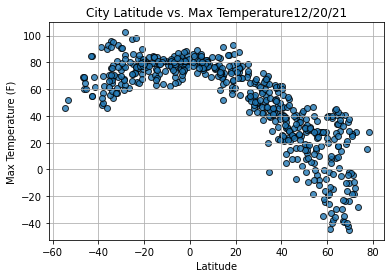

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs ma. temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graphs properties 
plt.title(f"City Latitude vs. Max Temperature" + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

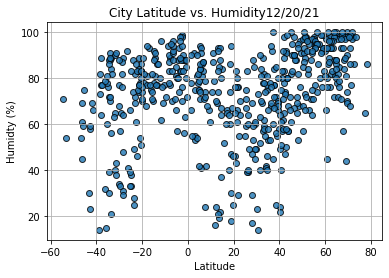

In [16]:
# Build the scatter plots for latitude vs humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity" + time.strftime("%x"))
plt.ylabel("Humidty (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("weather_data/Fig2.png")
# Show the plot
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

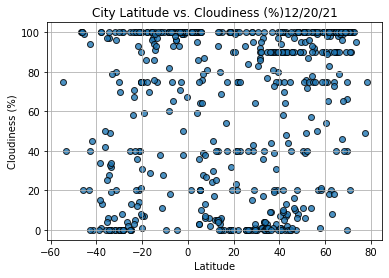

In [17]:
# Build the scatter plots for latitude vs cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%)" + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("weather_data/Fig3.png")
# Show the plot
plt.show

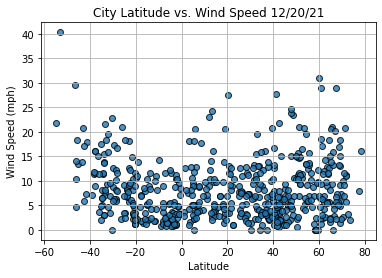

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()